## 1. Load Datasets

In [1]:

import pandas as pd

# Load raw datasets (Balanced v2)
students_before = pd.read_csv("../ml_engine/data/processed/students_balanced_v2.csv")
internships_before = pd.read_csv("../ml_engine/data/processed/internships_balanced_v2.csv")

# Make copies for cleaning
students_after = students_before.copy()
internships_after = internships_before.copy()


## 2. Missing Values Before Cleaning

In [2]:

print("=== Students Missing Values (Before) ===")
print(students_before.isnull().sum())

print("\n=== Internships Missing Values (Before) ===")
print(internships_before.isnull().sum())


=== Students Missing Values (Before) ===
Student_ID                          0
Name                                0
Email                               0
Phone                               0
Skills                              0
Qualification                    1015
Location_Preferences             1144
Sector_Interests                 1832
Social_Category                     0
Past_Internship_Participation       0
Preferred_Job_Type                  0
Experience                          0
dtype: int64

=== Internships Missing Values (Before) ===
Job_ID                      0
Job_Title                   0
Job_Type                    0
Company_Name                0
Sector                    839
Posted_Date                 0
Location                    0
Cities                    393
States                      0
Skills_Required             0
Qualification_Required    648
Experience_Required         0
Stipend                     0
Duration                    0
Number_of_Openings       

## 3. Cleaning Rules (Fill Missing, Normalize, Scale)

In [3]:

from sklearn.preprocessing import MinMaxScaler
import re

# --- Students Cleaning ---
students_after["Qualification"] = students_after["Qualification"].fillna("Not Provided")
students_after["Location_Preferences"] = students_after["Location_Preferences"].fillna("Any Location")
students_after["Sector_Interests"] = students_after["Sector_Interests"].fillna("General")

# Experience
students_after["Experience"] = pd.to_numeric(students_after["Experience"], errors="coerce")
students_after["Experience"] = students_after["Experience"].apply(lambda x: max(x, 0))
students_after["Experience"] = students_after["Experience"].fillna(students_after["Experience"].median())

scaler_exp = MinMaxScaler()
students_after["Experience_Scaled"] = scaler_exp.fit_transform(students_after[["Experience"]])

# --- Internships Cleaning ---
internships_after["Sector"] = internships_after["Sector"].fillna("General")
internships_after["Cities"] = internships_after["Cities"].fillna("Not Mentioned")

# Stipend
internships_after["Stipend"] = pd.to_numeric(internships_after["Stipend"], errors="coerce")
internships_after["Stipend"] = internships_after["Stipend"].fillna(internships_after["Stipend"].median())

stipend_cap = internships_after["Stipend"].quantile(0.99)
internships_after["Stipend"] = internships_after["Stipend"].clip(upper=stipend_cap)

scaler_stipend = MinMaxScaler()
internships_after["Stipend_Scaled"] = scaler_stipend.fit_transform(internships_after[["Stipend"]])

# Experience Required
if "Experience_Required" in internships_after.columns:
    def extract_number(val):
        if pd.isna(val):
            return None
        match = re.findall(r"\d+", str(val))
        return int(match[0]) if match else None

    internships_after["Experience_Required"] = internships_after["Experience_Required"].apply(extract_number)
    internships_after["Experience_Required"] = internships_after["Experience_Required"].fillna(
        internships_after["Experience_Required"].median()
    )
    exp_req_cap = internships_after["Experience_Required"].quantile(0.99)
    internships_after["Experience_Required"] = internships_after["Experience_Required"].clip(upper=exp_req_cap)

    scaler_exp_req = MinMaxScaler()
    internships_after["Experience_Required_Scaled"] = scaler_exp_req.fit_transform(
        internships_after[["Experience_Required"]]
    )


## 4. Missing Values After Cleaning

In [4]:

print("=== Students Missing Values (After) ===")
print(students_after.isnull().sum())

print("\n=== Internships Missing Values (After) ===")
print(internships_after.isnull().sum())


=== Students Missing Values (After) ===
Student_ID                       0
Name                             0
Email                            0
Phone                            0
Skills                           0
Qualification                    0
Location_Preferences             0
Sector_Interests                 0
Social_Category                  0
Past_Internship_Participation    0
Preferred_Job_Type               0
Experience                       0
Experience_Scaled                0
dtype: int64

=== Internships Missing Values (After) ===
Job_ID                          0
Job_Title                       0
Job_Type                        0
Company_Name                    0
Sector                          0
Posted_Date                     0
Location                        0
Cities                          0
States                          0
Skills_Required                 0
Qualification_Required        648
Experience_Required             0
Stipend                         0
Durati

## 5. Sample Rows Before vs After Cleaning

In [5]:

print("=== Students Sample Before Cleaning ===")
display(students_before.head(5))

print("\n=== Students Sample After Cleaning ===")
display(students_after.head(5))

print("\n=== Internships Sample Before Cleaning ===")
display(internships_before.head(5))

print("\n=== Internships Sample After Cleaning ===")
display(internships_after.head(5))


=== Students Sample Before Cleaning ===


,Student_ID,Name,Email,Phone,Skills,Qualification,Location_Preferences,Sector_Interests,Social_Category,Past_Internship_Participation,Preferred_Job_Type,Experience
0,S00001,Daniel Miller1,lberger@example.net,6126046660,"['Web Development', 'Python', 'MS Office', 'Da...",M.Tech CS,['Pune'],"['Blockchain', 'Cybersecurity', 'Software']",ST,False,Part-time,49
1,S00002,Richard Chaney,antonio41@example.net,6929020454,"['Cloud Computing', 'Data Science']",B.Tech IT,NaN,NaN,ST,True,Remote,7
2,S00003,Scott Simpson,kaitlinsmith@example.com,65204223409,"['Kubernetes', 'C++', 'Python']",M.Tech CS,NaN,NaN,EWS,False,Part-time,19
3,S00004,Mary Melendez,nsmith@example.net,8334793686,"['Java', 'Robotics', 'C++', 'Excel']",B.Tech IT,['Bangalore'],"['UI/UX', 'AI/ML']",EWS,True,Remote,36
4,S00005,David Cervantes,alyssaturner@example.com,8101392088,"['C++', 'Web Development', 'AI/ML']",NaN,NaN,NaN,SC,False,Internship,8



=== Students Sample After Cleaning ===


,Student_ID,Name,Email,Phone,Skills,Qualification,Location_Preferences,Sector_Interests,Social_Category,Past_Internship_Participation,Preferred_Job_Type,Experience,Experience_Scaled
0,S00001,Daniel Miller1,lberger@example.net,6126046660,"['Web Development', 'Python', 'MS Office', 'Da...",M.Tech CS,['Pune'],"['Blockchain', 'Cybersecurity', 'Software']",ST,False,Part-time,49,0.408333
1,S00002,Richard Chaney,antonio41@example.net,6929020454,"['Cloud Computing', 'Data Science']",B.Tech IT,Any Location,General,ST,True,Remote,7,0.058333
2,S00003,Scott Simpson,kaitlinsmith@example.com,65204223409,"['Kubernetes', 'C++', 'Python']",M.Tech CS,Any Location,General,EWS,False,Part-time,19,0.158333
3,S00004,Mary Melendez,nsmith@example.net,8334793686,"['Java', 'Robotics', 'C++', 'Excel']",B.Tech IT,['Bangalore'],"['UI/UX', 'AI/ML']",EWS,True,Remote,36,0.300000
4,S00005,David Cervantes,alyssaturner@example.com,8101392088,"['C++', 'Web Development', 'AI/ML']",Not Provided,Any Location,General,SC,False,Internship,8,0.066667



=== Internships Sample Before Cleaning ===


,Job_ID,Job_Title,Job_Type,Company_Name,Sector,Posted_Date,Location,Cities,States,Skills_Required,...,Experience_Required,Stipend,Duration,Number_of_Openings,Actively_Hiring,Description,Links,Diversity_Preferences,Past_Participation,Tags
0,J00001,Marketing Intern,Internship,Rodriguez-Ryan,Web Development,2025-05-31,Chennai,"['Pune', 'Kolkata']","['Uttar Pradesh', 'Delhi']","['Kubernetes', 'SQL', 'Machine Learning', 'Web...",...,15 months,4909,3 Months,4,True,Party dark north central. Remain hear rest com...,http://avery.com/,"['OBC', 'General']",True,"['AI', 'Finance']"
1,J00002,UI/UX Intern,Part-time,Kennedy-Ramirez,Blockchain,2025-07-26,Bangalore,['Bangalore'],['Tamil Nadu'],"['Tableau', 'Python', 'Communication']",...,5 months,0,2 Months,1,True,Note animal idea family news professor all. Ru...,http://www.hall.info/,[],True,"['Cybersecurity', 'AI']"
2,J00003,AI/ML Intern,Remote,"Daniels, Davis and Gilbert",Blockchain,2025-08-13,Hyderabad,"['Jaipur', 'Mumbai']","['Delhi', 'Uttar Pradesh']","['Tableau', 'Excel', 'Cloud Computing', 'Machi...",...,19 months,2311,3 Months,7,True,Serve although knowledge its. First as group v...,http://www.collier-wilson.info/,"['SC', 'General']",True,"['Cybersecurity', 'Blockchain', 'Cloud', 'Pyth..."
3,J00004,Robotics Intern,Internship,Smith-Garza,UI/UX,2025-07-16,Kolkata,"['Hyderabad', 'Delhi']","['Tamil Nadu', 'Maharashtra']","['Robotics', 'JavaScript', 'Tableau', 'IoT']",...,22 months,0,2 Months,4,False,No write day official everyone. Against blue m...,http://martin.com/,[],False,"['Finance', 'Blockchain', 'AI', 'Cloud']"
4,J00005,Finance Intern,Internship,"Jones, Butler and Walker",Finance,2025-06-19,Delhi,"['Hyderabad', 'Jaipur']","['Delhi', 'West Bengal']","['JavaScript', 'Data Science', 'Communication']",...,8 months,0,1 Month,10,False,More open catch question. Yes property any sim...,https://www.collins.com/,"['General', 'SC']",True,"['UX', 'Cloud', 'AI']"



=== Internships Sample After Cleaning ===


,Job_ID,Job_Title,Job_Type,Company_Name,Sector,Posted_Date,Location,Cities,States,Skills_Required,...,Duration,Number_of_Openings,Actively_Hiring,Description,Links,Diversity_Preferences,Past_Participation,Tags,Stipend_Scaled,Experience_Required_Scaled
0,J00001,Marketing Intern,Internship,Rodriguez-Ryan,Web Development,2025-05-31,Chennai,"['Pune', 'Kolkata']","['Uttar Pradesh', 'Delhi']","['Kubernetes', 'SQL', 'Machine Learning', 'Web...",...,3 Months,4,True,Party dark north central. Remain hear rest com...,http://avery.com/,"['OBC', 'General']",True,"['AI', 'Finance']",0.147768,0.625000
1,J00002,UI/UX Intern,Part-time,Kennedy-Ramirez,Blockchain,2025-07-26,Bangalore,['Bangalore'],['Tamil Nadu'],"['Tableau', 'Python', 'Communication']",...,2 Months,1,True,Note animal idea family news professor all. Ru...,http://www.hall.info/,[],True,"['Cybersecurity', 'AI']",0.000000,0.208333
2,J00003,AI/ML Intern,Remote,"Daniels, Davis and Gilbert",Blockchain,2025-08-13,Hyderabad,"['Jaipur', 'Mumbai']","['Delhi', 'Uttar Pradesh']","['Tableau', 'Excel', 'Cloud Computing', 'Machi...",...,3 Months,7,True,Serve although knowledge its. First as group v...,http://www.collier-wilson.info/,"['SC', 'General']",True,"['Cybersecurity', 'Blockchain', 'Cloud', 'Pyth...",0.069564,0.791667
3,J00004,Robotics Intern,Internship,Smith-Garza,UI/UX,2025-07-16,Kolkata,"['Hyderabad', 'Delhi']","['Tamil Nadu', 'Maharashtra']","['Robotics', 'JavaScript', 'Tableau', 'IoT']",...,2 Months,4,False,No write day official everyone. Against blue m...,http://martin.com/,[],False,"['Finance', 'Blockchain', 'AI', 'Cloud']",0.000000,0.916667
4,J00005,Finance Intern,Internship,"Jones, Butler and Walker",Finance,2025-06-19,Delhi,"['Hyderabad', 'Jaipur']","['Delhi', 'West Bengal']","['JavaScript', 'Data Science', 'Communication']",...,1 Month,10,False,More open catch question. Yes property any sim...,https://www.collins.com/,"['General', 'SC']",True,"['UX', 'Cloud', 'AI']",0.000000,0.333333


## 6. Feature Distributions Before vs After vs Scaled

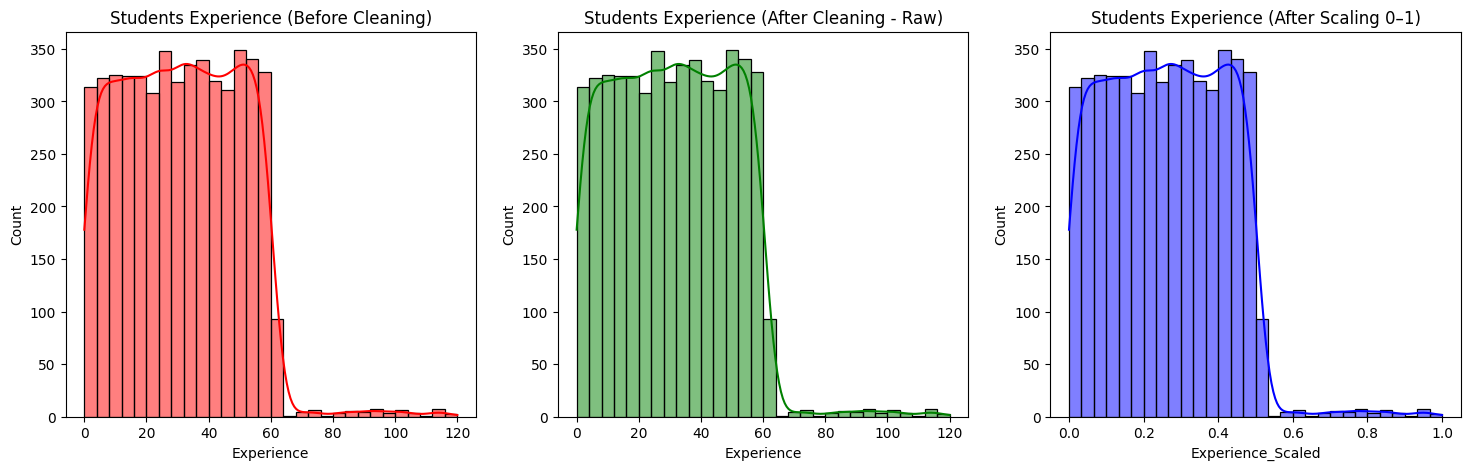

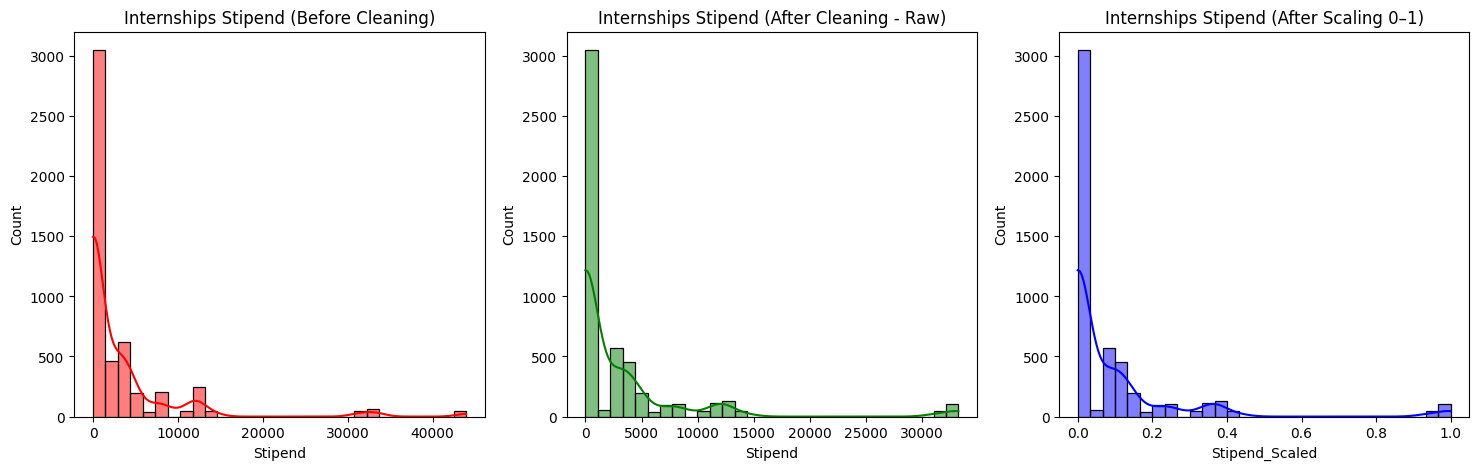

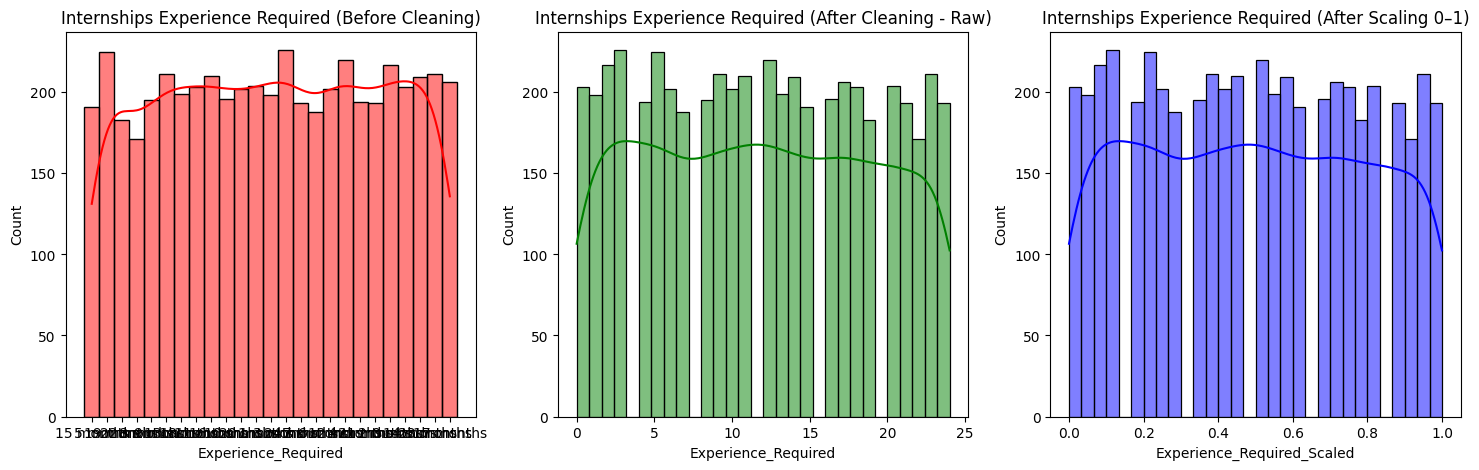

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

def compare_feature(before, after, scaled, feature_name):
    plt.figure(figsize=(18,5))

    plt.subplot(1,3,1)
    sns.histplot(before, bins=30, kde=True, color="red")
    plt.title(f"{feature_name} (Before Cleaning)")

    plt.subplot(1,3,2)
    sns.histplot(after, bins=30, kde=True, color="green")
    plt.title(f"{feature_name} (After Cleaning - Raw)")

    plt.subplot(1,3,3)
    sns.histplot(scaled, bins=30, kde=True, color="blue")
    plt.title(f"{feature_name} (After Scaling 0–1)")

    plt.show()

# Students: Experience
compare_feature(
    students_before["Experience"],
    students_after["Experience"],
    students_after["Experience_Scaled"],
    "Students Experience"
)

# Internships: Stipend
compare_feature(
    internships_before["Stipend"],
    internships_after["Stipend"],
    internships_after["Stipend_Scaled"],
    "Internships Stipend"
)

# Internships: Experience Required
if "Experience_Required" in internships_before.columns:
    compare_feature(
        internships_before["Experience_Required"],
        internships_after["Experience_Required"],
        internships_after["Experience_Required_Scaled"],
        "Internships Experience Required"
    )


## 7. Internship Recommendation (TF-IDF + Numeric Similarities)

In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import ast

def parse_skills(skills_str):
    try:
        if isinstance(skills_str, str):
            skills = ast.literal_eval(skills_str)
            return " ".join(skills)
        elif isinstance(skills_str, list):
            return " ".join(skills)
    except:
        return ""
    return ""
def recommend_internships(student_id, students, internships, top_n=5,
                          w_text=0.6, w_exp=0.2, w_stipend=0.2):
    import numpy as np
    
    # Make local copies to avoid KeyError issues
    students = students.copy()
    internships = internships.copy()

    # Pick student profile
    student = students[students["Student_ID"] == student_id].iloc[0]

    # --- Prepare text features ---
    students["skills_text"] = students["Skills"].apply(parse_skills)
    internships["skills_text"] = internships["Skills_Required"].apply(parse_skills)

    internships["combined_text"] = (
        internships["Job_Title"].fillna("") + " " +
        internships["Qualification_Required"].fillna("") + " " +
        internships["skills_text"]
    )

    student_text = (
        str(student["Qualification"]) + " " +
        str(student["skills_text"]) + " " +
        str(student["Sector_Interests"])
    )

    # --- Text Similarity ---
    tfidf = TfidfVectorizer()
    internship_matrix = tfidf.fit_transform(internships["combined_text"])
    student_vec = tfidf.transform([student_text])
    text_sim = cosine_similarity(student_vec, internship_matrix).flatten()

    # --- Numeric Similarities ---
    if "Experience_Scaled" in student and "Experience_Required_Scaled" in internships:
        exp_diff = abs(internships["Experience_Required_Scaled"] - student["Experience_Scaled"])
        exp_sim = 1 - exp_diff
    else:
        exp_sim = np.zeros(len(internships))

    stipend_sim = internships["Stipend_Scaled"] if "Stipend_Scaled" in internships.columns else np.zeros(len(internships))

    # --- Final Score ---
    final_score = (w_text * text_sim) + (w_exp * exp_sim) + (w_stipend * stipend_sim)

    # --- Top N Recommendations ---
    top_indices = final_score.argsort()[::-1][:top_n]
    results = internships.iloc[top_indices][
        ["Job_ID", "Job_Title", "Company_Name", "Stipend", "Duration", "Skills_Required"]
    ].copy()
    results["Text_Similarity"] = text_sim[top_indices]
    results["Exp_Similarity"] = exp_sim.iloc[top_indices] if hasattr(exp_sim, "iloc") else exp_sim[top_indices]
    results["Stipend_Similarity"] = stipend_sim.iloc[top_indices] if hasattr(stipend_sim, "iloc") else stipend_sim[top_indices]
    results["Final_Score"] = final_score[top_indices]

    return results


In [10]:
# Example: Recommend internships for first student (S00001)
student_id = "S00001"

recommendations = recommend_internships(student_id, students_after, internships_after, top_n=5)

print(f"🎯 Top 5 Internship Recommendations for Student {student_id}")
display(recommendations)


🎯 Top 5 Internship Recommendations for Student S00001


,Job_ID,Job_Title,Company_Name,Stipend,Duration,Skills_Required,Text_Similarity,Exp_Similarity,Stipend_Similarity,Final_Score
2687,J02688,Web Development Intern,Brown-Jones,31321,6 Months,"['Web Development', 'Excel', 'Data Science', '...",0.736841,0.825000,0.942807,0.795666
4811,J04812,Cybersecurity Intern,Simon-Porter,33221,3 Months,"['Web Development', 'Python', 'Data Science']",0.747880,0.408333,1.000000,0.730394
4203,J04204,Cybersecurity Intern,Baxter Group,33221,2 Months,"['IoT', 'Tableau', 'JavaScript', 'Data Science']",0.636614,0.675000,1.000000,0.716968
1171,J01172,Cybersecurity Intern,Davis LLC,33221,3 Months,"['Excel', 'Communication']",0.611373,0.741667,1.000000,0.715157
4854,J04855,Marketing Intern,"Dean, Moore and Vasquez",33221,3 Months,"['Data Science', 'Blockchain', 'Tableau', 'Pyt...",0.598459,0.700000,1.000000,0.699076
